## How multiple thresholds changes the features detected

#### Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tobac
import xarray as xr

#### Generate Feature Data

Here, we will generate some simple feature data where the features that we want to detect are *higher* values than the surrounding (0).

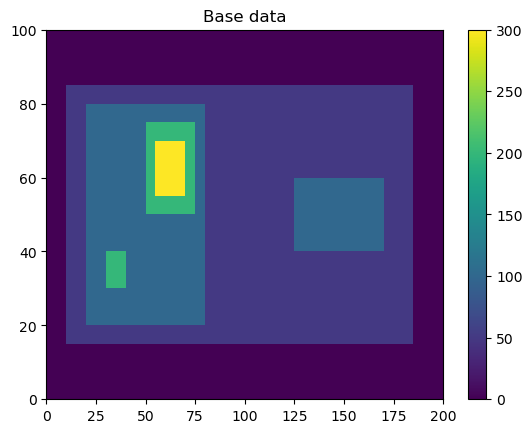

In [2]:
# Dimensions here are time, y, x.
input_field_arr = np.zeros((1,100,200))
input_field_arr[0, 15:85, 10:185]=50
input_field_arr[0, 20:80, 20:80]=100
input_field_arr[0, 40:60, 125:170] = 100
input_field_arr[0, 30:40, 30:40]=200
input_field_arr[0, 50:75, 50:75]=200
input_field_arr[0, 55:70, 55:70]=300

plt.pcolormesh(input_field_arr[0])
plt.colorbar()
plt.title("Base data")
plt.show()

We now need to generate an Iris DataCube out of this dataset to run tobac feature detection. 
One can use xarray to generate a DataArray and then convert it to Iris, as done here. 
Version 2.0 of tobac (currently in development) will allow the use of xarray directly with tobac. 

In [3]:
input_field_iris = xr.DataArray(input_field_arr, dims=['time', 'Y', 'X'], coords={'time': [np.datetime64('2019-01-01T00:00:00')]}).to_iris()

***

#### Single Threshold
Let's say that you are looking to detect any features above value 50 and don't need to separate out individual cells within the larger feature. For example, if you're interested in tracking a single mesoscale convective system, you may not care about the paths of individual convective cells within the feature. 

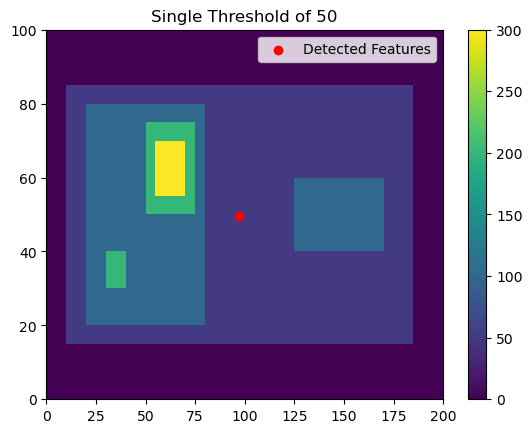

In [4]:
thresholds = [50,]
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center')
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("Single Threshold of 50")
plt.show()

Now, let's try a single threshold of 150, which will give us two features on the left side of the image.

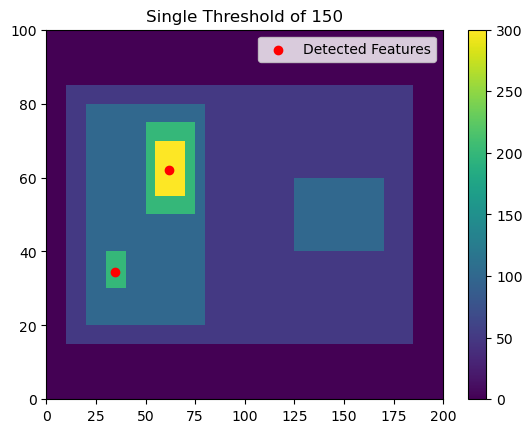

In [5]:
thresholds = [150,]
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center')
plt.pcolormesh(input_field_arr[0])
plt.colorbar()
# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("Single Threshold of 150")
plt.show()

This gives us two detected features with minimum values >150. 

***

#### Multiple Thresholds
Now let's say that you want to detect all three maxima within this feature. You may want to do this, if, for example, you were trying to detect overhshooting tops within a cirrus shield. You could pick a single threshold, but if you pick 100, you won't separate out the two features on the left. For example:

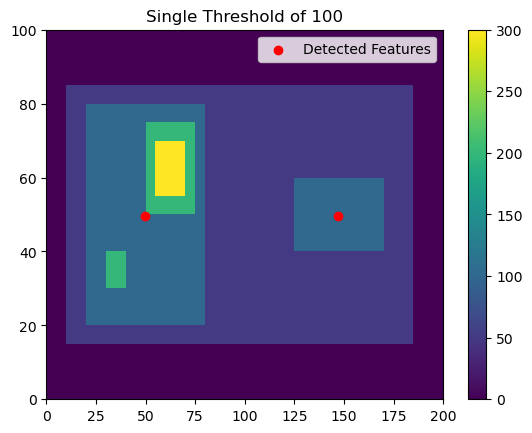

In [6]:
thresholds = [100, ]
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center')
plt.pcolormesh(input_field_arr[0])
plt.colorbar()

# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("Single Threshold of 100")
plt.show()

This is the power of having multiple thresholds. We can set thresholds of 50, 100, 150, 200 and capture both:

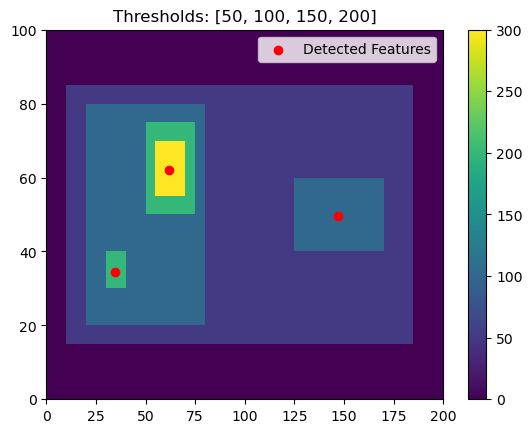

In [7]:
thresholds = [50, 100, 150, 200]
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center')
plt.pcolormesh(input_field_arr[0])
plt.colorbar()

# Plot all features detected
plt.scatter(x=single_threshold_features['hdim_2'].values, y=single_threshold_features['hdim_1'].values, color='r', label="Detected Features")
plt.legend()
plt.title("Thresholds: [50, 100, 150, 200]")
plt.show()

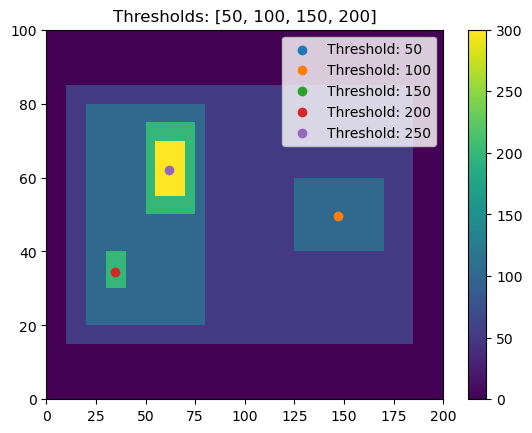

In [8]:
thresholds = [50, 100, 150, 200, 250]
# Using 'center' here outputs the feature location as the arithmetic center of the detected feature
single_threshold_features = tobac.feature_detection_multithreshold(field_in = input_field_iris, dxy = 1000, threshold=thresholds, target='maximum', position_threshold='center')
plt.pcolormesh(input_field_arr[0])
plt.colorbar()

# Plot all features detected
for i, threshold in enumerate(thresholds):
    thresholded_points = single_threshold_features[single_threshold_features['threshold_value'] == threshold]
    plt.scatter(x=thresholded_points['hdim_2'].values, 
                y=thresholded_points['hdim_1'].values, 
                color='C'+str(i),
                label="Threshold: "+str(threshold))
plt.legend()
plt.title("Thresholds: [50, 100, 150, 200]")
plt.show()